In [1]:
# Import required libraries
using LinearAlgebra, Random, Plots, Plots.PlotMeasures

# Plot colours
pltColours = ["#4c599a", "#e66c6c", "#7bc572", "#fda440", "#55bad8",
                "#e467a8", "#6ba2d8", "#c87fcd", "#448b26", "#565559"]

d = 4     # Dimension of Hilbert space
N = 5000  # Number of points in ensemble
N‚Çõ = 200  # Number of standard deviations to test

# List of random functions. Each random function f(œÉ)
# should return a random number from a distribution
# symmetric about 0 with a standard deviation of œÉ
f·µ£ = Dict(
    "uniform" => œÉ -> (2rand()-1)*2*‚àö3*œÉ,  # Uniform distribution
    "normal" => œÉ -> randn()*œÉ           # Normal/Gaussian distribution
)

function generateùìï(ùìì,œÉ‚Çò)
    œÉ = range(1/N‚Çõ,œÉ‚Çò,length=N‚Çõ) # array containing œÉ
    ùìï‚ÇÄ  = zeros(N‚Çõ) # array containing ‚ü®F‚ü©
    ùìï¬≤‚ÇÄ = zeros(N‚Çõ) # array containing ‚ü®F¬≤‚ü©
    ùìï‚ÇÅ  = zeros(N‚Çõ) # array containing |tr‚ü®U‚ü©|/d
    ùìï¬≤‚ÇÅ = zeros(N‚Çõ) # array containing lowest-order cumulant expansion of ‚ü®F¬≤‚ü©
    for n ‚àà 1:N‚Çõ
        ŒΩ = [[f·µ£[ùìì](œÉ[n]) for _ ‚àà 1:d] for _ ‚àà 1:N] # Generate ŒΩ‚Çñ = ‚à´dt' Œ¥V(t')/ƒß such that ŒΩ‚Çñ ‚àº ùìì(œÉ)
        U = [Diagonal(exp.(-im*ŒΩ[i])) for i ‚àà 1:N]  # Generate U = diag(exp(-iŒΩ‚ÇÅ), exp(-iŒΩ‚ÇÇ), ‚Ä¶)
        ùìï‚ÇÄ[n]  = sum([abs(tr(u)) for u ‚àà U])/N/d    # Calculate ‚ü®F‚ü© = ‚ü®|tr(U)|‚ü©/d
        ùìï¬≤‚ÇÄ[n] = sum([abs2(tr(u)) for u ‚àà U])/N/d^2 # Calculate ‚ü®F¬≤‚ü© = ‚ü®|tr(U)|¬≤‚ü©/d¬≤
        ùìï‚ÇÅ[n]  = abs(tr(sum(U)/N))/d                # Calculate |tr‚ü®U‚ü©|/d
        ùìï¬≤‚ÇÅ[n] = 1/d                                # Calculate ‚ü®F¬≤‚ü© ‚âà 1/d + 2/d¬≤ ‚àë‚±º<‚Çñ exp(-¬Ω‚ü®ŒΩ‚±º¬≤‚ü©)exp(-¬Ω‚ü®ŒΩ‚Çñ¬≤‚ü©)exp(-‚ü®ŒΩ‚±ºŒΩ‚Çñ‚ü©)
        for j ‚àà 1:d, k ‚àà j+1:d
            ùìï¬≤‚ÇÅ[n] += 2/d^2*exp(-real(sum(ŒΩ[i][j]^2 for i ‚àà 1:N))/2N) *
                    exp(-real(sum(ŒΩ[i][k]^2 for i ‚àà 1:N))/2N) *
                    exp(real(sum(ŒΩ[i][j]*ŒΩ[i][k] for i ‚àà 1:N))/N)
        end
    end
    return œÉ,ùìï‚ÇÄ,ùìï¬≤‚ÇÄ,ùìï‚ÇÅ,ùìï¬≤‚ÇÅ
end

function plotFidelity(ùìì,œÉ‚Çò)
    œÉ,ùìï‚ÇÄ,ùìï¬≤‚ÇÄ,ùìï‚ÇÅ,ùìï¬≤‚ÇÅ = generateùìï(ùìì,œÉ‚Çò)
    plt = scatter(œÉ,ùìï‚ÇÄ,label="‚ü®F‚ü©",color=pltColours[1],markerstrokewidth=0, size=(650,300))
    scatter!(plt,œÉ,.‚àöùìï¬≤‚ÇÄ,label="‚àö‚ü®F¬≤‚ü©",color=pltColours[2],markerstrokewidth=0)
    scatter!(plt,œÉ,ùìï‚ÇÅ,label="|tr‚ü®U‚ü©|/d",color=pltColours[3],marker=:cross,markersize=3)
    scatter!(plt,œÉ,.‚àöùìï¬≤‚ÇÅ,label="‚âà ‚àö‚ü®F¬≤‚ü©",color=pltColours[4],marker=:cross,markersize=3)
    title!(plt,"œÉ ‚â§ $œÉ‚Çò, ŒΩ‚Çñ ~ $ùìì")
    xlabel!(plt,"Standard Deviation œÉ")
    ylabel!(plt,"Average Fidelity")
    display(plt)
end

plotFidelity (generic function with 1 method)

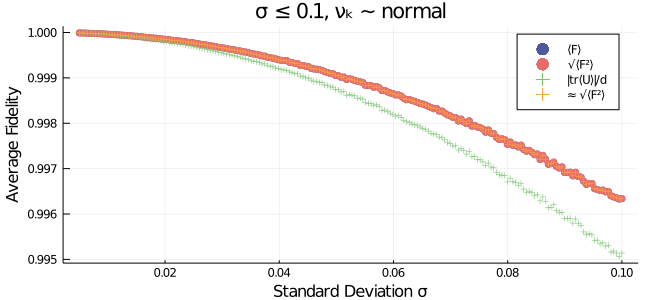

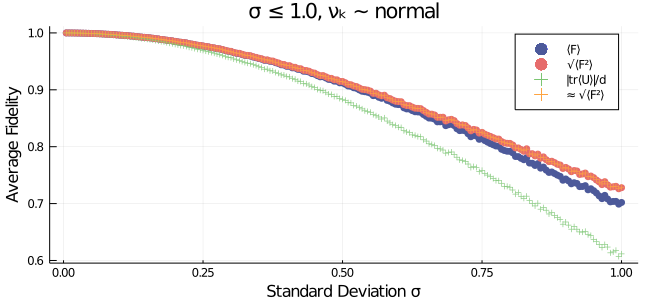

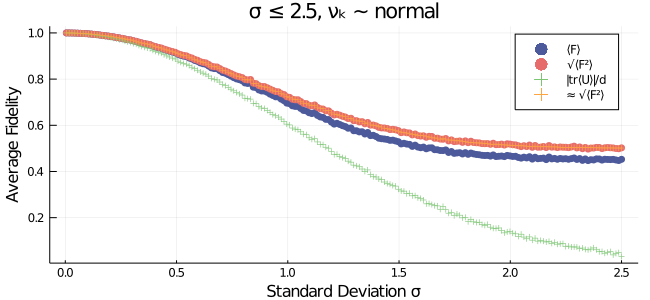

In [2]:
ùìì = "normal"  # Random distribution to use

for œÉ‚Çò ‚àà [0.1,1.0,2.5] # Maximum standard deviation
    plotFidelity(ùìì,œÉ‚Çò)
end

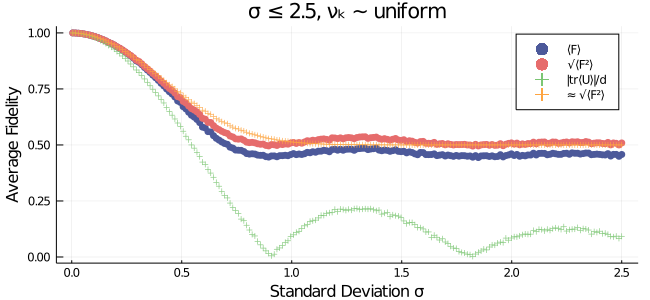

In [3]:
ùìì = "uniform"  # Random distribution to use
œÉ‚Çò = 2.5      # Maximum standard deviation

plotFidelity(ùìì,œÉ‚Çò)

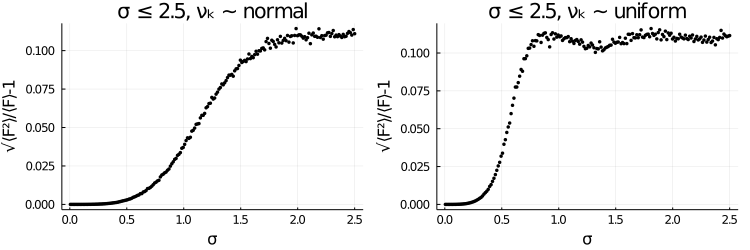

In [4]:
œÉ‚Çò = 2.5 # Maximum standard deviation

plots = Dict()
for ùìì ‚àà ["normal","uniform"]
    œÉ,ùìï‚ÇÄ,ùìï¬≤‚ÇÄ,_,_ = generateùìï(ùìì,œÉ‚Çò)
    plots[ùìì] = scatter(
        œÉ,.‚àöùìï¬≤‚ÇÄ ./ ùìï‚ÇÄ .- 1,
        color="black", markerstrokewidth=0,
        markersize=2,
        label=false,
        xlabel="œÉ", ylabel="‚àö‚ü®F¬≤‚ü©/‚ü®F‚ü©-1",
        title="œÉ ‚â§ $œÉ‚Çò, ŒΩ‚Çñ ~ $ùìì"
    )
end

display(plot(values(plots)..., size=(750,250),bottom_margin=3mm))